In [2]:
library(ArchR)
library(Matrix)
library(dplyr)
library(GenomicRanges)
library(Biostrings)
source("/ailab/user/fanyimin/CellSpace-master/tutorial/variable-peaks/IterativeLSI.R")
library(GenomicRanges)
library(Matrix)
library(data.table)
library(dplyr)
library(BSgenome.Hsapiens.UCSC.hg38)



                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______      
          /   \     |   _ 

In [3]:
peaks <- fread(
  file = "var.csv",
  header = TRUE,      
  stringsAsFactors = FALSE
)

peaks.gr <- makeGRangesFromDataFrame(
  df = peaks,
  seqinfo = seqinfo(BSgenome.Hsapiens.UCSC.hg38)
)


In [4]:
cellname <- fread(
  file = "obs.csv",
  header = TRUE,     
  stringsAsFactors = FALSE
)
cellname$label
counts <- readMM("matrix.mtx")
counts

[1] "c10" "c2"  "c0"  "c4"  "c4"  "c11" "c4"  "c2"  "c4"  "c1"  "c9"  "c0" 
  [13] "c1"  "c9"  "c5"  "c6"  "c1"  "c3"  "c10" "c7"  "c10" "c2"  "c1"  "c7" 
  [25] "c0"  "c8"  "c1"  "c8"  "c0"  "c4"  "c2"  "c4"  "c10" "c0"  "c10" "c1" 
  [37] "c9"  "c3"  "c5"  "c0"  "c1"  "c7"  "c1"  "c4"  "c1"  "c0"  "c3"  "c0" 
  [49] "c10" "c5"  "c7"  "c0"  "c2"  "c2"  "c10" "c3"  "c0"  "c4"  "c3"  "c1" 
  [61] "c2"  "c2"  "c4"  "c4"  "c5"  "c2"  "c0"  "c1"  "c0"  "c8"  "c4"  "c9" 
  [73] "c3"  "c1"  "c2"  "c9"  "c0"  "c0"  "c5"  "c2"  "c0"  "c5"  "c0"  "c8" 
  [85] "c1"  "c2"  "c1"  "c2"  "c8"  "c4"  "c2"  "c4"  "c1"  "c10" "c0"  "c3" 
  [97] "c3"  "c2"  "c10" "c11" "c2"  "c4"  "c2"  "c7"  "c4"  "c3"  "c5"  "c5" 
 [109] "c2"  "c7"  "c0"  "c3"  "c1"  "c1"  "c2"  "c1"  "c2"  "c2"  "c1"  "c3" 
 [121] "c4"  "c5"  "c3"  "c2"  "c5"  "c0"  "c6"  "c0"  "c4"  "c2"  "c5"  "c0" 
 [133] "c4"  "c4"  "c0"  "c0"  "c0"  "c7"  "c0"  "c1"  "c7"  "c7"  "c9"  "c8" 
 [145] "c4"  "c1"  "c7"  "c5"  "c1"  "c0"  "c0"  "c3"  "c5"  "c4"  "c1"  "c0" 
 [157] "c0"  "c5"  "c1"  "c2"  "c4"  "c5"  "c2"  "c1"  "c1"  "c2"  "c9"  "c0" 
 [169] "c1"  "c2"  "c4"  "c1"  "c7"  "c1"  "c3"  "c0"  "c0"  "c1"  "c2"  "c2" 
 [181] "c3"  "c4"  "c9"  "c5"  "c5"  "c1"  "c5"  "c5"  "c3"  "c8"  "c10" "c2" 
 [193] "c0"  "c2"  "c1"  "c2"  "c2"  "c1"  "c2"  "c0"  "c0"  "c2"  "c8"  "c2" 
 [205] "c0"  "c4"  "c9"  "c7"  "c9"  "c3"  "c0"  "c0"  "c10" "c0"  "c7"  "c0" 
 [217] "c11" "c2"  "c4"  "c7"  "c1"  "c0"  "c2"  "c1"  "c3"  "c0"  "c0"  "c7" 
 [229] "c10" "c3"  "c4"  "c1"  "c10" "c0"  "c0"  "c11" "c0"  "c2"  "c0"  "c4" 
 [241] "c1"  "c10" "c1"  "c0"  "c10" "c2"  "c0"  "c1"  "c4"  "c7"  "c2"  "c11"
 [253] "c2"  "c5"  "c0"  "c2"  "c4"  "c1"  "c7"  "c0"  "c6"  "c0"  "c10" "c0" 
 [265] "c0"  "c0"  "c5"  "c9"  "c4"  "c4"  "c2"  "c1"  "c9"  "c1"  "c2"  "c0" 
 [277] "c0"  "c3"  "c2"  "c5"  "c2"  "c10" "c4"  "c5"  "c0"  "c5"  "c1"  "c0" 
 [289] "c4"  "c10" "c4"  "c1"  "c0"  "c1"  "c4"  "c4"  "c1"  "c1"  "c4"  "c3" 
 [301] "c1"  "c0"  "c4"  "c4"  "c3"  "c4"  "c0"  "c0"  "c4"  "c11" "c0"  "c5" 
 [313] "c5"  "c5"  "c0"  "c1"  "c7"  "c2"  "c8"  "c0"  "c3"  "c2"  "c4"  "c4" 
 [325] "c0"  "c3"  "c4"  "c5"  "c5"  "c1"  "c2"  "c9"  "c1"  "c5"  "c13" "c0" 
 [337] "c0"  "c1"  "c0"  "c3"  "c4"  "c1"  "c2"  "c2"  "c2"  "c1"  "c0"  "c2" 
 [349] "c2"  "c2"  "c5"  "c1"  "c2"  "c9"  "c0"  "c4"  "c10" "c1"  "c0"  "c5" 
 [361] "c0"  "c1"  "c1"  "c0"  "c3"  "c0"  "c10" "c5"  "c0"  "c11" "c2"  "c1" 
 [373] "c1"  "c0"  "c11" "c2"  "c0"  "c3"  "c4"  "c3"  "c2"  "c5"  "c5"  "c10"
 [385] "c10" "c2"  "c7"  "c9"  "c0"  "c5"  "c0"  "c0"  "c10" "c5"  "c0"  "c1" 
 [397] "c5"  "c3"  "c0"  "c4"  "c0"  "c5"  "c0"  "c0"  "c5"  "c0"  "c2"  "c0" 
 [409] "c3"  "c1"  "c7"  "c0"  "c3"  "c5"  "c4"  "c2"  "c4"  "c0"  "c3"  "c1" 
 [421] "c3"  "c0"  "c10" "c10" "c9"  "c9"  "c0"  "c0"  "c3"  "c4"  "c4"  "c5" 
 [433] "c0"  "c3"  "c4"  "c3"  "c4"  "c1"  "c0"  "c1"  "c0"  "c1"  "c7"  "c4" 
 [445] "c0"  "c0"  "c1"  "c4"  "c0"  "c2"  "c2"  "c8"  "c0"  "c10" "c9"  "c0" 
 [457] "c3"  "c2"  "c4"  "c2"  "c5"  "c7"  "c0"  "c5"  "c3"  "c2"  "c1"  "c1" 
 [469] "c3"  "c4"  "c10" "c9"  "c0"  "c1"  "c4"  "c7"  "c2"  "c0"  "c10" "c1" 
 [481] "c2"  "c5"  "c10" "c1"  "c0"  "c10" "c4"  "c4"  "c5"  "c1"  "c4"  "c4" 
 [493] "c2"  "c0"  "c10" "c0"  "c4"  "c0"  "c7"  "c0"  "c8"  "c0"  "c9"  "c2" 
 [505] "c10" "c5"  "c0"  "c7"  "c7"  "c0"  "c8"  "c8"  "c9"  "c5"  "c1"  "c1" 
 [517] "c1"  "c5"  "c1"  "c1"  "c2"  "c3"  "c0"  "c5"  "c12" "c10" "c5"  "c11"
 [529] "c1"  "c4"  "c5"  "c5"  "c3"  "c10" "c1"  "c7"  "c4"  "c0"  "c10" "c0" 
 [541] "c0"  "c10" "c2"  "c10" "c9"  "c2"  "c2"  "c1"  "c10" "c2"  "c5"  "c5" 
 [553] "c2"  "c3"  "c2"  "c10" "c0"  "c1"  "c2"  "c1"  "c1"  "c2"  "c2"  "c0" 
 [565] "c10" "c0"  "c7"  "c0"  "c6"  "c1"  "c8"  "c5"  "c3"  "c0"  "c2"  "c7" 
 [577] "c0"  "c4"  "c4"  "c5"  "c3"  "c11" "c1"  "c4"  "c4"  "c2"  "c0"  "c5" 
 [589] "c1"  "c3"  "c0"  "c0"  "c10" "c0"  "c7"  "c6"  "c3"  "c7"  "c0"  "c10"
 [601] "c1"  "c1"  "c0"  "c2"  "c10" "c4"  "c3"  "c4"

8981 x 50000 sparse Matrix of class "dgTMatrix"
                                                                               
   [1,]  . . . . . . . 1 . . . . . . . . . . . . . . . . . . . . . . . . ......
   [2,]  . . . . 2 2 . . . . . . . . . . . . . . . . . . . . . . . . . . ......
   [3,]  . . . . . . . . . . . . 2 . . . . . . . . . . . . 1 . . . . . . ......
   [4,]  . . . . . . . . . . . . . . . . . . . 4 . . . 4 . . . 2 . . . . ......
   [5,]  2 . . . . . . 2 . . . . . . . . . 2 . . . . . . 2 1 . . . . . . ......
   [6,]  . . . . . . . . . . . . 2 . . . . . . . . . . . 4 . . 2 . . . . ......
   [7,]  . . . . . . . . 1 2 . . . . . . . . . . . . . . . . . . . . . . ......
   [8,]  . . . . . 3 . . . . . 2 2 . . . . . . . . . . . . . . . . . . . ......
   [9,]  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
  [10,]  . . . . . . . 1 1 3 . . . . . . . . . . . . . . . . . . . . . . ......
  [11,]  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

In [5]:
counts@x[counts@x != 0] <- 1
counts
dimnames(counts) <- list(cellname$label, as.character(peaks.gr))

8981 x 50000 sparse Matrix of class "dgTMatrix"
                                                                              
   [1,] . . . . . . . 1 . . . . . . . . . . . . . . . . . . . . . . . . ......
   [2,] . . . . 1 1 . . . . . . . . . . . . . . . . . . . . . . . . . . ......
   [3,] . . . . . . . . . . . . 1 . . . . . . . . . . . . 1 . . . . . . ......
   [4,] . . . . . . . . . . . . . . . . . . . 1 . . . 1 . . . 1 . . . . ......
   [5,] 1 . . . . . . 1 . . . . . . . . . 1 . . . . . . 1 1 . . . . . . ......
   [6,] . . . . . . . . . . . . 1 . . . . . . . . . . . 1 . . 1 . . . . ......
   [7,] . . . . . . . . 1 1 . . . . . . . . . . . . . . . . . . . . . . ......
   [8,] . . . . . 1 . . . . . 1 1 . . . . . . . . . . . . . . . . . . . ......
   [9,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
  [10,] . . . . . . . 1 1 1 . . . . . . . . . . . . . . . . . . . . . . ......
  [11,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
  [1

In [6]:
counts

  [[ suppressing 32 column names ‘chr1:191223-191723’, ‘chr1:630059-630559’, ‘chr1:903830-904330’ ... ]]

  [[ suppressing 32 column names ‘chr1:191223-191723’, ‘chr1:630059-630559’, ‘chr1:903830-904330’ ... ]]

  [[ suppressing 32 column names ‘chr1:191223-191723’, ‘chr1:630059-630559’, ‘chr1:903830-904330’ ... ]]



8981 x 50000 sparse Matrix of class "dgTMatrix"
                                                                          
c10 . . . . . . . 1 . . . . . . . . . . . . . . . . . . . . . . . . ......
c2  . . . . 1 1 . . . . . . . . . . . . . . . . . . . . . . . . . . ......
c0  . . . . . . . . . . . . 1 . . . . . . . . . . . . 1 . . . . . . ......
c4  . . . . . . . . . . . . . . . . . . . 1 . . . 1 . . . 1 . . . . ......
c4  1 . . . . . . 1 . . . . . . . . . 1 . . . . . . 1 1 . . . . . . ......
c11 . . . . . . . . . . . . 1 . . . . . . . . . . . 1 . . 1 . . . . ......
c4  . . . . . . . . 1 1 . . . . . . . . . . . . . . . . . . . . . . ......
c2  . . . . . 1 . . . . . 1 1 . . . . . . . . . . . . . . . . . . . ......
c4  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
c1  . . . . . . . 1 1 1 . . . . . . . . . . . . . . . . . . . . . . ......
c9  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
c0  . . . . . . 1 . . . . . . . . . . . . . . . . . 

In [7]:
genome <- BSgenome.Hsapiens.UCSC.hg38
getSeq(peaks.gr, x = genome) %>%
  writeXStringSet(filepath = "var_peaks.fa")
write(rownames(counts), ncolumns = 1, file = "cell-names.txt")
print(counts)
writeMM(counts, file = "cell_by_peak-counts.mtx")


#CellSpace \
  #-output data/CellSpace_embedding-var_tiles \
  #-cpMat  data/cell_by_tile-counts.mtx \
  #-peaks  data/var_tiles.fa


8981 x 50000 sparse Matrix of class "dgTMatrix"


  [[ suppressing 32 column names ‘chr1:191223-191723’, ‘chr1:630059-630559’, ‘chr1:903830-904330’ ... ]]

  [[ suppressing 32 column names ‘chr1:191223-191723’, ‘chr1:630059-630559’, ‘chr1:903830-904330’ ... ]]



                                                                          
c10 . . . . . . . 1 . . . . . . . . . . . . . . . . . . . . . . . . ......
c2  . . . . 1 1 . . . . . . . . . . . . . . . . . . . . . . . . . . ......
c0  . . . . . . . . . . . . 1 . . . . . . . . . . . . 1 . . . . . . ......
c4  . . . . . . . . . . . . . . . . . . . 1 . . . 1 . . . 1 . . . . ......
c4  1 . . . . . . 1 . . . . . . . . . 1 . . . . . . 1 1 . . . . . . ......
c11 . . . . . . . . . . . . 1 . . . . . . . . . . . 1 . . 1 . . . . ......
c4  . . . . . . . . 1 1 . . . . . . . . . . . . . . . . . . . . . . ......
c2  . . . . . 1 . . . . . 1 1 . . . . . . . . . . . . . . . . . . . ......
c4  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
c1  . . . . . . . 1 1 1 . . . . . . . . . . . . . . . . . . . . . . ......
c9  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
c0  . . . . . . 1 . . . . . . . . . . . . . . . . . . . . . . . . . ......
c1  . . 1 . . . . 1 . . .

  [[ suppressing 32 column names ‘chr1:191223-191723’, ‘chr1:630059-630559’, ‘chr1:903830-904330’ ... ]]



                                                                          
c0  . . . . 1 . . . . . . 1 1 . . . . . . . . . . . . . . . 1 . . . ......
c2  . . . . . 1 . . . 1 . . . . . . . . . 1 . . . . . . . . . . . . ......
c0  . . . . . . . . . . . . . . . . . . . 1 . . . . . 1 . . . . . . ......
c6  . . . . . . . . . . . . . . . . . . . . . . . 1 . . . . . . . . ......
c8  . . . . . 1 . . . . . . . . . . . . . 1 . . . . . . . . . . . . ......
c3  . . . . . . . . . . . . . . . . . . . . . . . . 1 . . . . . . . ......
c0  . . . . . . . . 1 . . . . . . . . . . 1 . . . 1 . . . . . . . . ......
c5  . . . . . . . . . . . . . . . 1 . . . . . . . 1 . . . . . . . . ......
c2  . . 1 . . . . . . . . . 1 . . . . . . . . . . . . . . . . . . . ......
c6  . . . . . . . . 1 . 1 . . . . 1 . . 1 . . . . . . . . . . . . . ......
c0  . . . . . . . . . . . . 1 . . . . . . . . . . . . . . . . . . . ......
c4  . . . . . . . . . . . . . . . . . . . . . . . . . 1 . . . . . . ......
c0  . . . . . . . . . . .

NULL

In [2]:
library(CellSpace)
library(TFBSTools)
library(JASPAR2020)
library(dplyr)
source("/ailab/user/fanyimin/CellSpace-master/tutorial/plot-functions.R")

In [3]:
cell.idx <- readLines("cell-names.txt")
cso <- CellSpace(
  project = "ATAC",
  emb.file = "CellSpace_embedding-var_tiles.tsv",
  meta.data = as.data.frame(cell.idx)
)

In [4]:
cso <- find_neighbors(cso, n.neighbors = 20) %>%
  find_clusters(resolution = c(0.8, 1.2)) %>%
  run_UMAP(n.neighbors = 20, min.dist = 0.2, spread = 1)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 8981
Number of edges: 333309

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8492
Number of communities: 13
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 8981
Number of edges: 333309

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8050
Number of communities: 14
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
23:38:16 UMAP embedding parameters a = 1.262 b = 1.003

23:38:16 Read 8981 rows and found 30 numeric columns

23:38:16 Using Annoy for neighbor search, n_neighbors = 20

23:38:16 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

23:38:17 Writing NN index file to temp file /tmp/RtmpGSdPwp/file386460e34d7d

23:38:17 Searching Annoy index using 1 thread, search_k = 2000

23:38:19 Annoy recall = 100%

23:38:20 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 

[1] 14


cell.idx,Clusters.res_0.8,Clusters.res_1.2
<chr>,<fct>,<fct>
c10,9,9
c2,2,2
c0,0,0
c4,3,3
c4,3,3
c11,3,3
c4,3,3
c2,2,2
c4,3,3


NULL

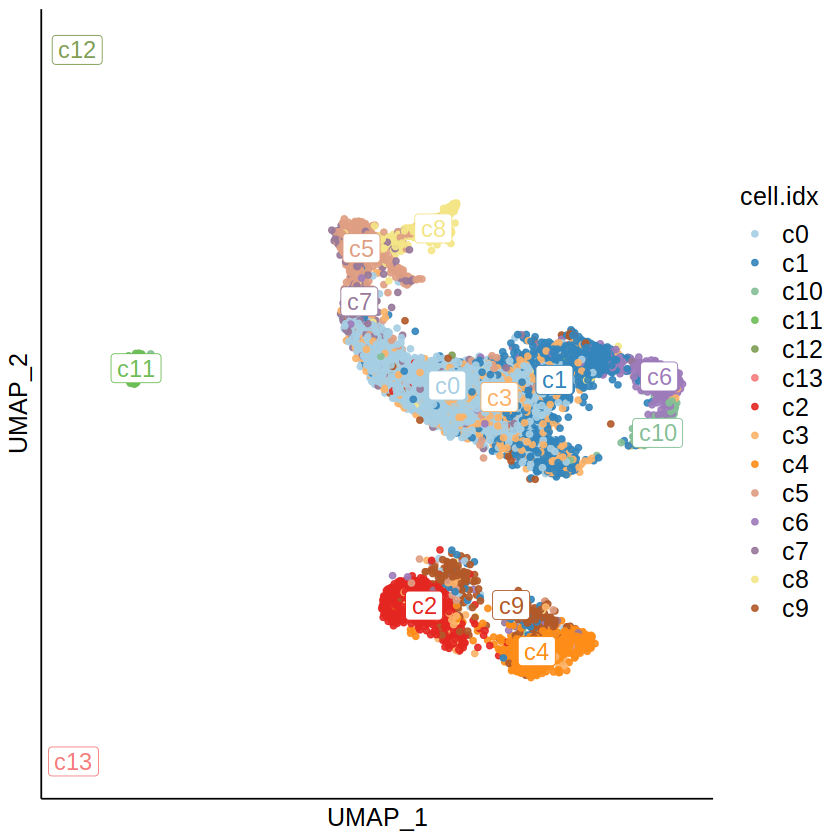

In [5]:
library(RColorBrewer)

n <- length(unique(cso@meta.data$cell.idx))
print(n)
pal <- colorRampPalette(brewer.pal(12, "Paired"))(14)

cso@meta.data
head(cso@meta.data$CellName)
plot.groups(
  cso, vis = "cells_UMAP", groups = "cell.idx",
  pal = pal, add.labels = T
)

In [16]:
# 读取文件行
pwm_txt <- readLines("motif.txt")

# 定义一个函数将文本文件转换为PWM列表
parse_pwm <- function(txt_lines, selected_motifs) {
  pwm_list <- list()  # 用于存储PWM的列表
  i <- 1
  while (i <= length(txt_lines)) {
    # 找到motif名称和ID (行以 ">" 开头)
    if (startsWith(txt_lines[i], ">")) {
      full_name <- sub("^>", "", txt_lines[i])  # 删除 '>' 符号
      parts <- strsplit(full_name, "\t")[[1]]  # 以 '\t' 分割
      motif_name <- parts[2]  # 选择 '\t' 后的部分作为motif name
      
      # 检查该motif是否在selected_motifs列表中
      if (motif_name %in% selected_motifs) {
        i <- i + 1
        
        # 初始化一个空的矩阵，列数动态确定
        pwm_matrix <- NULL
        
        # 定义碱基顺序
        bases <- c("A", "C", "G", "T")
        
        # 读取 A, C, G, T 行
        for (j in 1:4) {
          base_line <- txt_lines[i]
          
          # 提取行中的数字
          base_values <- as.numeric(unlist(strsplit(gsub("[^0-9 ]", "", base_line), "\\s+")))
          
          # 初始化矩阵时，根据第一行的长度动态确定列数
          if (is.null(pwm_matrix)) {
            pwm_matrix <- matrix(NA, nrow = 4, ncol = length(base_values))
          }
          
          # 检查 base_values 是否与矩阵列数一致
          if (length(base_values) == ncol(pwm_matrix)) {
            pwm_matrix[j, ] <- base_values
          } else {
            stop(paste("行", i, "中的数值数量不正确，预期", ncol(pwm_matrix), "个，实际", length(base_values), "个。"))
          }
          
          i <- i + 1
        }
        
        # 设置矩阵的行名为 A, C, G, T
        rownames(pwm_matrix) <- bases
        pwm_matrix <- pwm_matrix[, -1]  # 去掉第一列
        
        # 将矩阵和motif名加入列表
        pwm_list[[motif_name]] <- pwm_matrix
      } else {
        # 如果motif不在selected_motifs中，跳过该motif的PWM部分
        i <- i + 5  # 跳过当前motif的行
      }
    }
  }
  return(pwm_list)
}

# 定义你需要选择的motif
selected_motifs <- c('PAX6', 'INSM1', 'SOX9', 'EMX2', 'LHX2', 'FOXG1', 
                     'TCF4', 'TCF3', 'TFAP2C', 'FOS', 'POU3F3', 'NEUROD2', 
                     'BHLHE22', 'JUND', 'MEF2C', 'POU2F2', 'NFIA', 'MEIS2', 'EOMES')

# 转换成PWM列表，筛选指定的motif
pwm_list <- parse_pwm(pwm_txt, selected_motifs)

# 检查结果
print(pwm_list)





$PAX6
  [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
A    2    2    4   39    3    1    1   21    1     2    36    11     1     1
C    4    2   26    2   34    0   37    2    4    14     0    11     5     0
G    4    0    1    1    1   41    4    2    1    25     6    13     3    17
T   33   39   12    1    5    1    1   18   37     2     1     8    34    25

$SOX9
  [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9]
A    3    8   71    2    7    2   13    9   14
C   55   38    1    1    0    2    0    7   31
G    9    6    0    2    4   72    4    6    7
T    9   24    4   71   65    0   59   54   24

$INSM1
  [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12]
A    1    0    0    6   16    0    0    0    0     0     3    10
C    0    0    8   15    0    0    1    0    0     2    16     0
G    4   20    3    0    0   24   23   24   24    16     0    12
T   19    4   13    3    8    0    0    0    0     6     5     2

$FOS
   [,1]  [,2]  [,3]  [,4]  [

In [17]:
pwm_to_pwmat <- function(pwm_list) {
  pwmat_list <- list()
  
  for (motif_name in names(pwm_list)) {
    pwm_matrix <- pwm_list[[motif_name]]
    print(pwm_matrix)
    # 创建 PWMatrix 对象，设置 matrixClass 为字符类型
    pwmat <- PWMatrix(
      ID = motif_name,
      name = motif_name,
      matrixClass = "Unknown",  # 确保 matrixClass 是字符型
      strand = "*",
      bg = c(A = 0.25, C = 0.25, G = 0.25, T = 0.25),  # 背景频率可以根据需要修改
      profileMatrix = pwm_matrix,  # 传递 PWM 矩阵到 profileMatrix 插槽
      pseudocounts = 1e-4,  # 设置非空的 pseudocounts
      tags = list()
    )
      
    # 将 PWMatrix 对象添加到列表中
    pwmat_list[[motif_name]] <- pwmat
  }

  return(pwmat_list)
}

# 调用函数进行转换
pwmat_list <- pwm_to_pwmat(pwm_list)

# 查看转换后的 PWMatrix 对象
print(pwmat_list)


  [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
A    2    2    4   39    3    1    1   21    1     2    36    11     1     1
C    4    2   26    2   34    0   37    2    4    14     0    11     5     0
G    4    0    1    1    1   41    4    2    1    25     6    13     3    17
T   33   39   12    1    5    1    1   18   37     2     1     8    34    25
  [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9]
A    3    8   71    2    7    2   13    9   14
C   55   38    1    1    0    2    0    7   31
G    9    6    0    2    4   72    4    6    7
T    9   24    4   71   65    0   59   54   24
  [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12]
A    1    0    0    6   16    0    0    0    0     0     3    10
C    0    0    8   15    0    0    1    0    0     2    16     0
G    4   20    3    0    0   24   23   24   24    16     0    12
T   19    4   13    3    8    0    0    0    0     6     5     2
   [,1]  [,2]  [,3]  [,4]  [,5]  [,6]  [,7]  [,8]  [,9]

In [18]:
motif.emb <- lapply(pwmat_list, function(pwm){
  motif_embedding(cso, PWM = pwm)
}) %>% do.call(what = rbind)

In [19]:
motif.score <- cosine_similarity(x = cso@cell.emb, y = motif.emb) %>% scale()

$cell.idx
      c10        c2        c0        c4       c11        c1        c9        c5 
"#FF0000" "#FF6D00" "#FFDB00" "#B6FF00" "#49FF00" "#00FF24" "#00FF92" "#00FFFF" 
       c6        c3        c7        c8       c13       c12 
"#0092FF" "#0024FF" "#4900FF" "#B600FF" "#FF00DB" "#FF006D" 

$Clusters.res_0.8
        9         2         0         3         5         4         7         8 
"#FF0000" "#FF7600" "#FFEB00" "#9DFF00" "#27FF00" "#00FF4E" "#00FFC4" "#00C4FF" 
        6         1        10        12        11 
"#004EFF" "#2700FF" "#9D00FF" "#FF00EB" "#FF0076" 

$Clusters.res_1.2
        9         2         0         3         5         4         7         8 
"#FF0000" "#FF6D00" "#FFDB00" "#B6FF00" "#49FF00" "#00FF24" "#00FF92" "#00FFFF" 
        6         1        12        10        13        11 
"#0092FF" "#0024FF" "#4900FF" "#B600FF" "#FF00DB" "#FF006D" 



'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



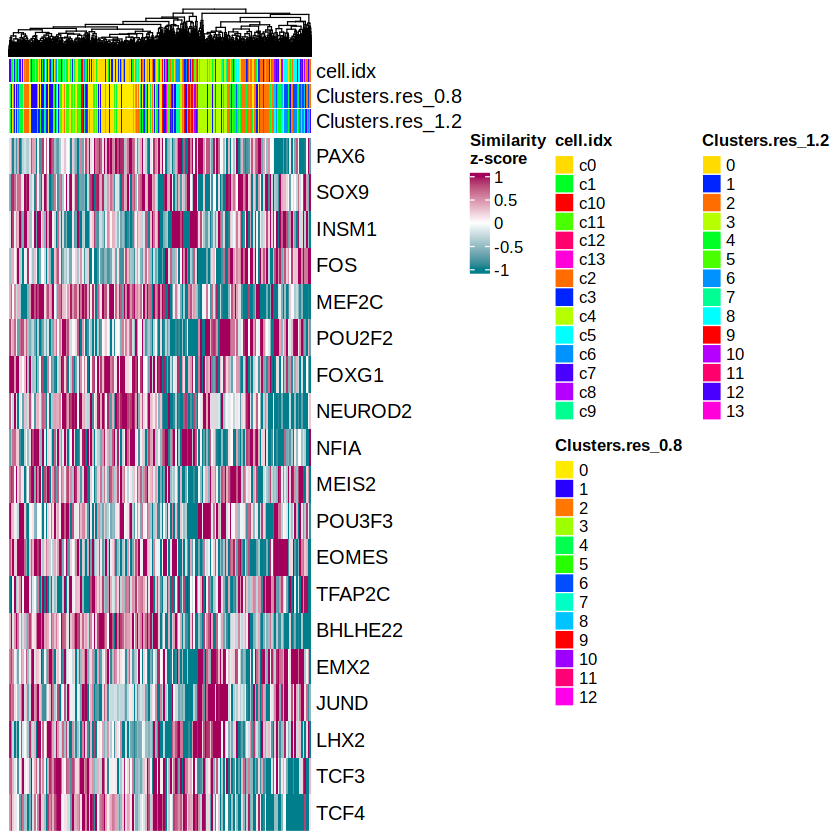

In [20]:
md <- cso@meta.data[, c("cell.idx", "Clusters.res_0.8", "Clusters.res_1.2")]
# 提取唯一的聚类名称
clusters_0.8 <- unique(md$Clusters.res_0.8)
clusters_1.2 <- unique(md$Clusters.res_1.2)
cell.idx_uq <- unique(md$cell.idx)

# 创建一个调色板，确保每个聚类有不同的颜色
pal <- list(
  cell.idx = setNames(rainbow(length(cell.idx_uq)), cell.idx_uq),
  Clusters.res_0.8 = setNames(rainbow(length(clusters_0.8)), clusters_0.8),
  Clusters.res_1.2 = setNames(rainbow(length(clusters_1.2)), clusters_1.2)
)

# 检查 pal 的内容
print(pal)
plot.scores(t(motif.score), cell.annot = md, pal = pal, column_split = cso$Cell_type)

In [21]:
motif.score

,PAX6,SOX9,INSM1,FOS,MEF2C,POU2F2,FOXG1,NEUROD2,NFIA,MEIS2,POU3F3,EOMES,TFAP2C,BHLHE22,EMX2,JUND,LHX2,TCF3,TCF4
1,1.01642975,0.64375549,-0.537927915,-0.64394963,0.82495920,-1.41010126,-0.6165129,-0.56836048,1.42969090,-1.031010153,-2.3963672088,-0.025142299,-0.55004449,-0.93013085,-0.32706160,-0.8028395,-1.36813823,0.51640214,0.32293565
2,0.34838404,1.04897982,-0.960611621,0.14560082,0.12665154,-0.11902651,-0.3957465,-0.58928748,-0.89259611,0.628640889,-1.6098664451,-1.799539777,-0.81012108,-1.33935540,0.58349131,-0.9044553,-0.26550471,-1.24515175,-1.06206597
3,0.45774799,-0.38013561,-0.964178619,-1.21949915,0.74445819,0.19751607,0.7344725,0.39631042,-0.86614563,1.086631842,0.2411150225,-0.592477070,-0.15545861,-0.02528679,0.38370793,0.4081894,0.37140097,-0.01032095,0.23201211
4,0.38724036,-0.40799556,1.487485628,-1.61746627,-1.20501499,0.15664077,1.1150390,0.13342272,-1.87196952,0.726881803,1.2034306502,-0.755909610,0.88145477,0.39138937,0.78697877,1.7467063,1.84756395,-0.98772552,-0.38975337
5,0.46846064,-2.74939353,0.067736551,-0.80836011,-1.23287949,1.02365763,0.8973518,-0.11950311,-1.12310298,-0.079519767,1.7397460400,0.680081492,-0.61660128,0.71858912,0.74433743,1.3909255,1.43076410,0.29362042,0.09872601
6,0.01505501,-1.35098636,0.003358354,-0.22906835,-0.78701020,0.02702892,0.6465779,-0.30911808,-0.07509361,-0.314999211,-0.3228393505,-0.006654424,0.51807698,0.43406591,0.60152595,2.3635504,1.16038573,1.63606137,0.78273534
7,1.08677918,-0.41332362,1.125206255,-1.40840497,-1.55623124,1.44192623,1.5229764,0.13955213,-1.46498125,-0.382658148,0.8506996715,-0.486565441,1.03523383,0.59917985,-0.26674563,1.4822339,1.18556311,-0.59328360,-0.43010074
8,-0.31133608,0.11127312,1.256208511,0.43367630,-1.86425242,1.51483332,1.7026407,-0.33911223,-0.22783185,-1.115086748,0.0429954712,-0.644959635,1.77906151,-0.49276746,-0.42236631,-0.1609331,-0.63758495,-0.67528805,-1.16729545
9,-1.03270046,-1.49188811,0.927690206,-0.83660572,-1.29250311,0.50894341,-1.0584353,0.79644778,0.59119593,-0.748101044,2.7428876675,0.193937447,0.05519210,-0.50566453,-0.09538854,2.6538755,1.31072827,1.53790264,1.46368184
10,-0.10189048,-0.80458142,-2.546158671,-0.83977080,0.61473224,1.05783428,-1.3163256,1.04601526,-0.87222669,0.946230676,1.1605278222,0.436077831,-0.63881488,-0.29861805,0.52895541,-0.2994913,-1.35899032,-0.12547011,0.28454181


In [26]:
# 假设 motif.score 是一个矩阵或数据框
# 将 motif.score 保存为 CSV 文件
write.csv(motif.score, file = "motif_score.csv", row.names = TRUE)

# 将 cso@cell.emb 保存为 CSV 文件
# cso@cell.emb 应该是一个矩阵或数据框
write.csv(as.data.frame(cso@cell.emb), file = "cell_embedding.csv", row.names = TRUE)

# 将 cso@motif.emb 保存为 CSV 文件
# cso@motif.emb 应该是一个矩阵或数据框
write.csv(as.data.frame(cso@kmer.emb), file = "motif_embedding.csv", row.names = TRUE)


In [25]:
cso@kmer.emb

,CS1,CS2,CS3,CS4,CS5,CS6,CS7,CS8,CS9,CS10,⋯,CS21,CS22,CS23,CS24,CS25,CS26,CS27,CS28,CS29,CS30
CTGACTGC,0.002360420,-9.89900e-03,-0.006592510,0.010193400,0.007566190,-0.004848700,6.23543e-03,-0.004392930,2.90886e-03,0.003430790,⋯,-0.002083520,-6.90110e-03,-0.00178304,0.001160910,-0.003908160,-0.000171829,-0.002345020,0.000249843,0.002740620,-0.010341600
CTGACTAA,0.018602300,-1.04098e-02,0.007308080,0.011526200,0.000297423,0.016878500,-1.75814e-02,-0.007216830,6.19025e-03,0.002175400,⋯,-0.016802400,-1.10289e-02,0.01939720,-0.008269550,-0.002348610,0.001010960,0.006108190,-0.000626588,-0.001834170,-0.003402880
CTGACTAC,-0.012951600,2.39033e-02,-0.009049900,-0.002206430,0.003436650,-0.019646800,9.30211e-03,0.012165900,-7.28421e-03,0.006338810,⋯,-0.017946800,7.35541e-03,-0.01306790,-0.005236000,0.001842740,-0.025557300,0.011235200,0.009186300,0.005557400,-0.011581500
CTGACTCA,-0.002804740,-8.04819e-03,0.000619373,-0.007502870,-0.005115510,-0.002428650,-8.41525e-03,-0.007527370,-2.88005e-03,-0.009981940,⋯,0.003873290,1.39368e-03,0.00845529,0.004426810,0.010022900,0.019344700,-0.010666400,-0.002510780,-0.004547470,0.004575160
CTGACTCC,0.001989320,-1.16415e-02,-0.000932184,0.004993990,-0.007991710,-0.009215020,-6.40654e-04,-0.011089300,1.37558e-02,0.011143700,⋯,-0.010754400,-8.64534e-03,0.00408475,-0.002696560,-0.003660340,0.009774420,-0.004106740,0.004116580,0.006270090,-0.002094380
CTGACTCG,0.000738328,-1.33298e-02,0.007629170,-0.001499400,0.006636870,0.009497250,1.01740e-02,0.002150000,1.03306e-02,-0.001387470,⋯,-0.008691240,-6.05567e-03,0.01606970,0.001940310,-0.013509000,0.001632150,-0.010577300,-0.007682250,-0.001042970,0.017246300
CTGACTTA,-0.021895700,8.02107e-05,0.002413740,-0.005772980,0.005613640,-0.000300759,9.41946e-03,-0.022641500,-4.44122e-03,0.001056440,⋯,0.008525500,-3.42464e-03,-0.00745101,-0.007733010,0.018645600,0.012894600,0.006809580,-0.011483400,-0.003990890,-0.005422170
CTGACTTC,-0.006775700,-8.05259e-04,0.003855440,-0.003181390,0.001923350,0.002203610,-3.91462e-03,0.000123852,-5.60802e-04,-0.009812940,⋯,-0.008269610,-7.50620e-03,0.00453925,-0.013762500,0.012686200,-0.002671320,-0.019510200,0.009059420,0.010703200,-0.006140590
CTGACTGA,0.002361520,-7.50659e-03,0.010783300,-0.006543180,0.006382260,0.001037700,1.31075e-02,-0.004760600,-1.77356e-02,-0.007124430,⋯,-0.011289600,2.94602e-03,-0.00380356,0.002780800,-0.005686730,0.005353260,0.002406210,0.006845920,-0.009916130,-0.004953110
CTGACCGC,-0.005054110,-4.25901e-04,0.019247100,0.012400400,-0.009596400,0.002977890,-1.10184e-02,0.001981200,-7.55852e-03,-0.005244090,⋯,0.005751190,8.06746e-04,0.00380679,-0.006048320,-0.004830150,0.013144000,0.007740110,-0.007049400,0.011438400,0.005866280
